In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 1. Importing
## Metaclean dataset

In [3]:
meta_df = pd.read_excel('data/metaClean43Brightspace.xlsx',
                        dtype={'studio':'category',
                               'rating':'category',
                               'genre':'category'},
                               parse_dates=['RelDate']
                               )

meta_df.head()

,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,2006-12-01
3,https://www.metacritic.com/movie/10-years,10 Years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,2012-09-14
4,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,2013-06-28


In [32]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11364 entries, 0 to 11363
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   url        11364 non-null  object        
 1   title      11364 non-null  object        
 2   studio     11014 non-null  category      
 3   rating     10297 non-null  category      
 4   runtime    11109 non-null  float64       
 5   cast       7662 non-null   object        
 6   director   11350 non-null  object        
 7   genre      11344 non-null  category      
 8   summary    5467 non-null   object        
 9   awards     4387 non-null   object        
 10  metascore  11364 non-null  int64         
 11  userscore  9259 non-null   float64       
 12  RelDate    11364 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.0+ MB


In [31]:
meta_df['title'].apply(len).max()

106

<AxesSubplot:>

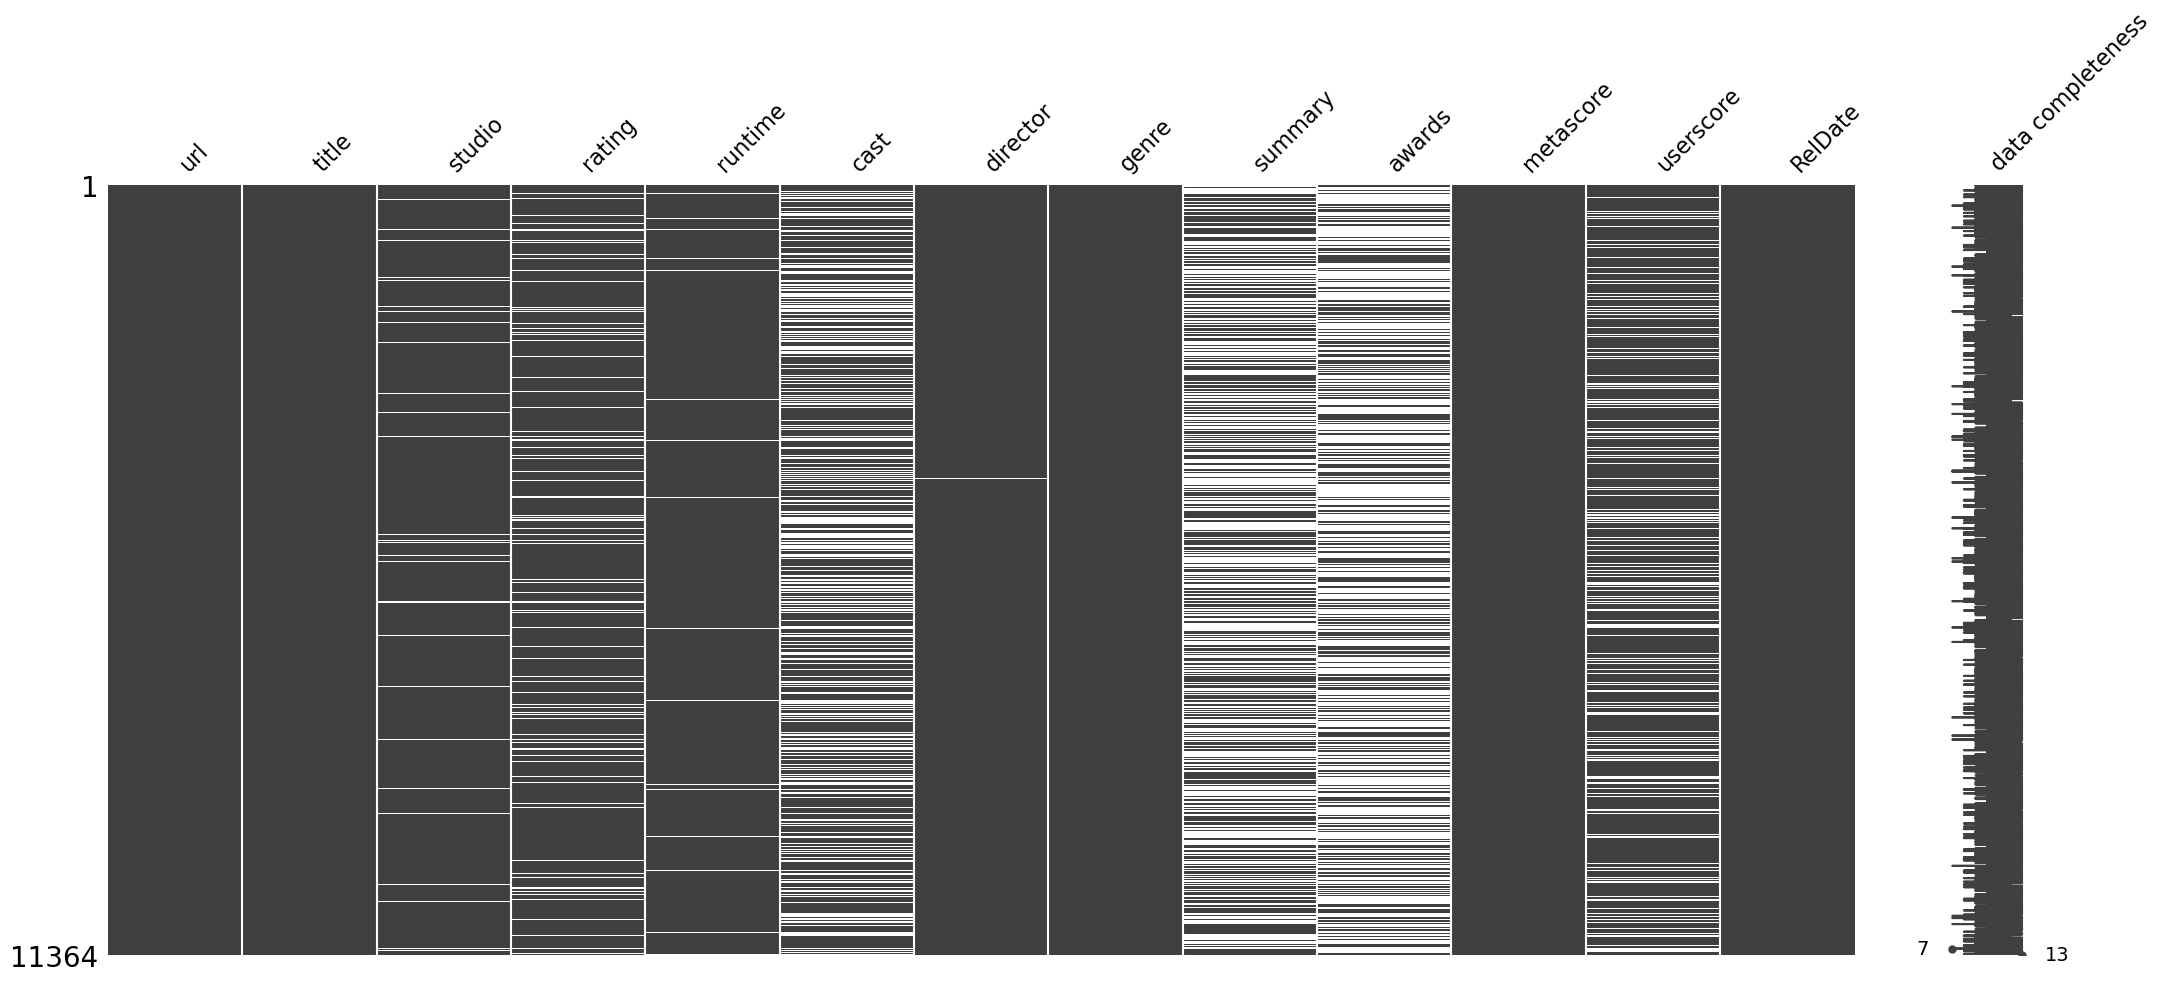

In [16]:
msno.matrix(meta_df, labels=True)

<AxesSubplot:xlabel='RelDate', ylabel='Count'>

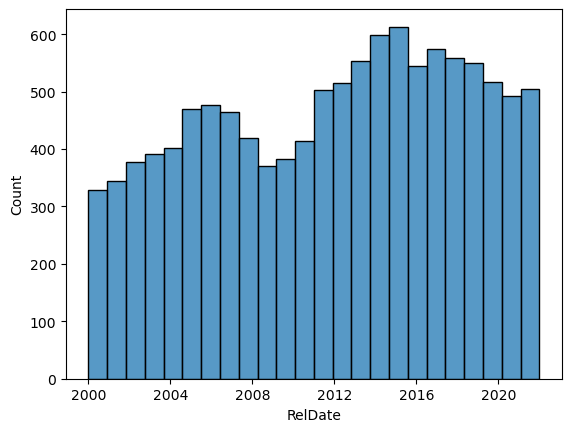

In [11]:
sns.histplot(x='RelDate', 
             data = meta_df)

In [65]:
# Calculate the length of the rating to determine the number of characters in the database
meta_df['rating'].apply(len).max()


11.0

## Sales dataset

In [13]:
sales = pd.read_excel('data/sales.xlsx',
                     #  dtype={'genre':'category',
                     #         'international_box_office':'int',
                     #         'domestic_box_office':'int',
                     #         'production_budget':'int',
                     #         'opening_weekend':'int',
                     #         'creative_type':'category'}
                             )

sales.head()

,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
0,2000.0,January 1st,Bakha Satang,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...
1,2001.0,January 12th,Antitrust,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust
2,2000.0,January 28th,Santitos,NaN,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,https://www.the-numbers.com/movie/Santitos
3,2002.0,2002 (Wide) by,Frank McKlusky C.I.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Frank-McKlus...
4,2002.0,January 25th,A Walk to Remember,Drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,Coming of Age,Contemporary Fiction,https://www.the-numbers.com/movie/Walk-to-Reme...


In [41]:
print(f"""The number of NAN values without conversion to INT {sales['worldwide_box_office'].isnull().sum()}
      the number of NAN values after conversion to INT: {sales['worldwide_box_office'].astype('int', errors='ignore').isnull().sum()}""")



The number of NAN values without conversion to INT 9053
      the number of NAN values after conversion to INT: 9053


In [55]:
sales['worldwide_box_office'].sample(5)

21121    191200000.0
6690       1819659.0
16360        43674.0
13069      6477036.0
5213          1130.0
Name: worldwide_box_office, dtype: float64

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30628 entries, 0 to 30627
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      30612 non-null  float64
 1   release_date              30612 non-null  object 
 2   title                     30604 non-null  object 
 3   genre                     28924 non-null  object 
 4   international_box_office  21575 non-null  float64
 5   domestic_box_office       11884 non-null  float64
 6   worldwide_box_office      21575 non-null  float64
 7   production_budget         4480 non-null   float64
 8   Unnamed: 8                0 non-null      float64
 9   opening_weekend           10929 non-null  float64
 10  theatre_count             10963 non-null  float64
 11  avg run per theatre       10952 non-null  float64
 12  runtime                   24559 non-null  float64
 13  keywords                  12517 non-null  object 
 14  creati

<AxesSubplot:>

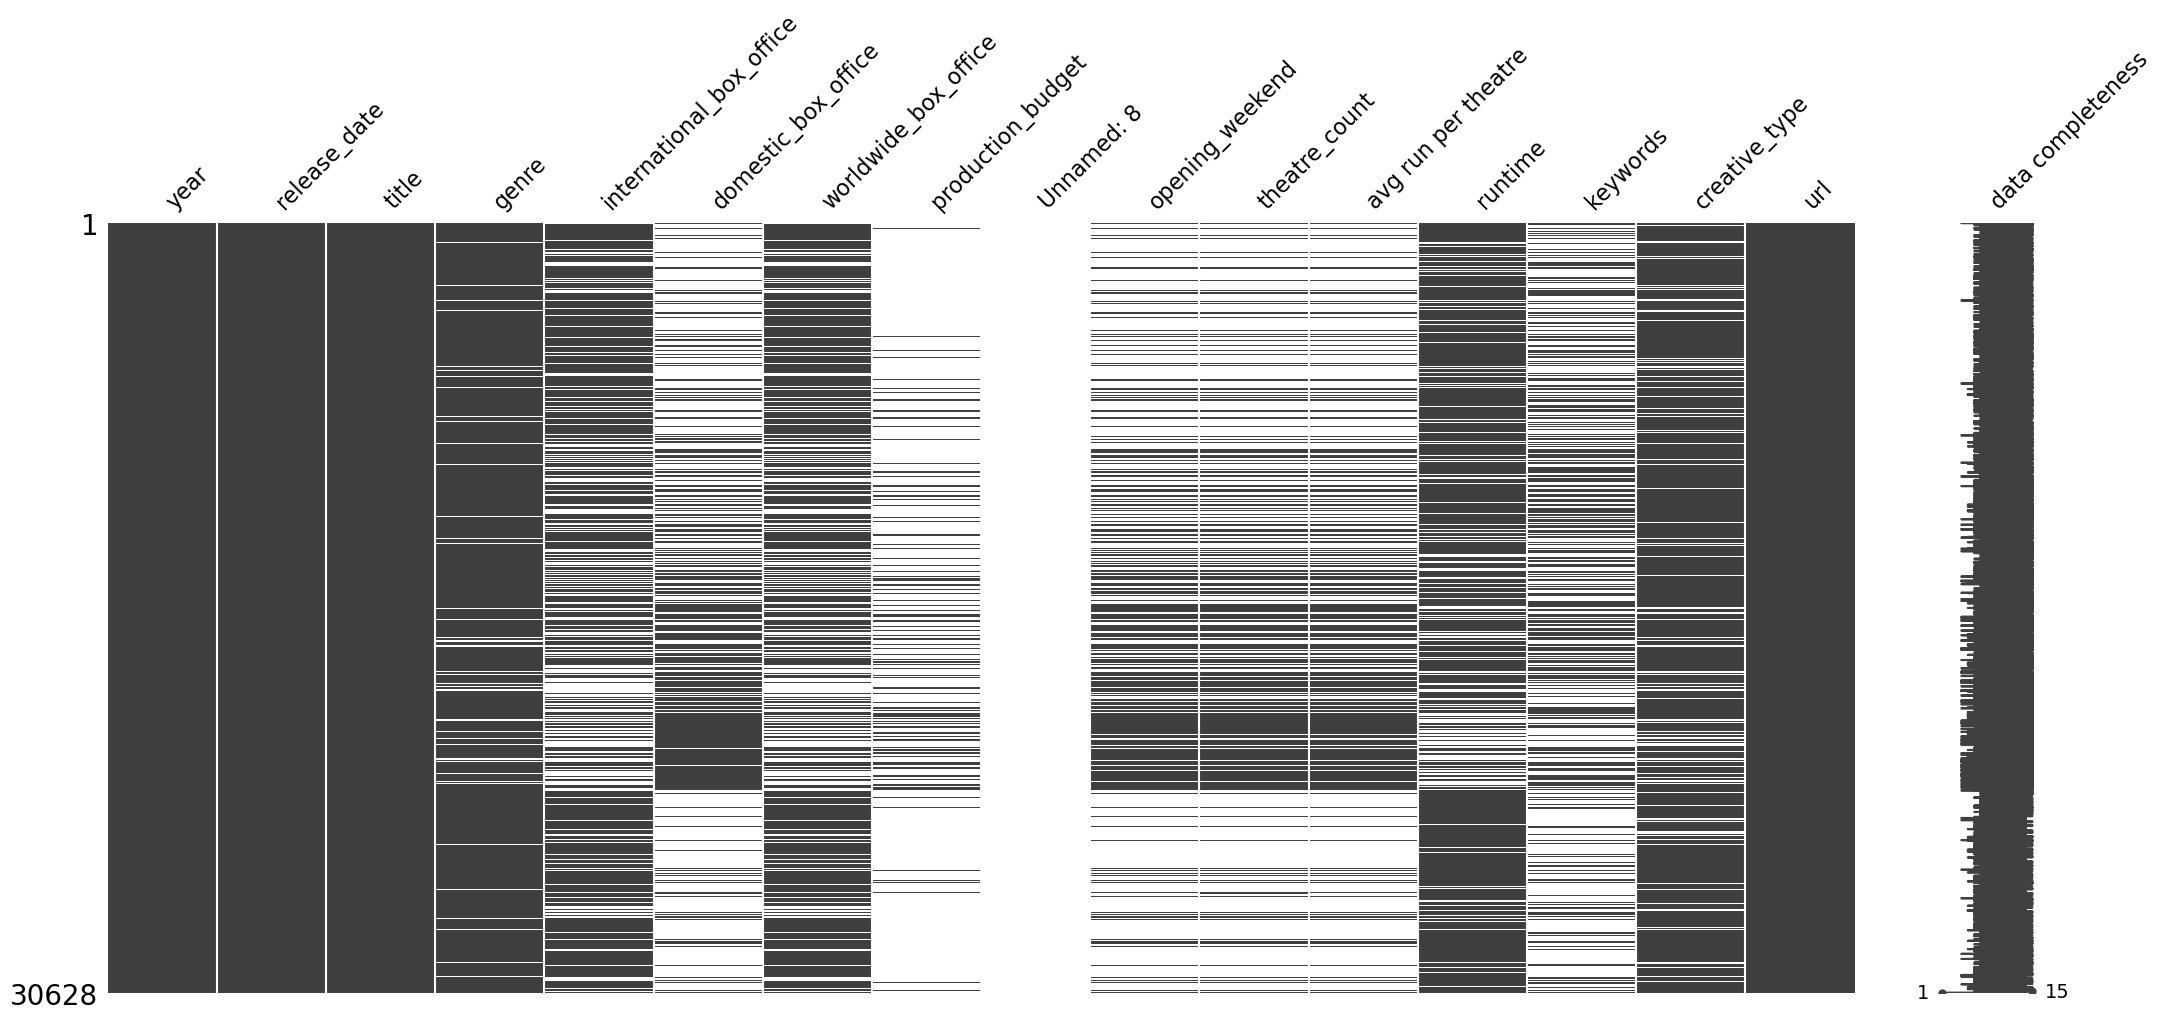

In [17]:
msno.matrix(sales, labels=True)

<AxesSubplot:>

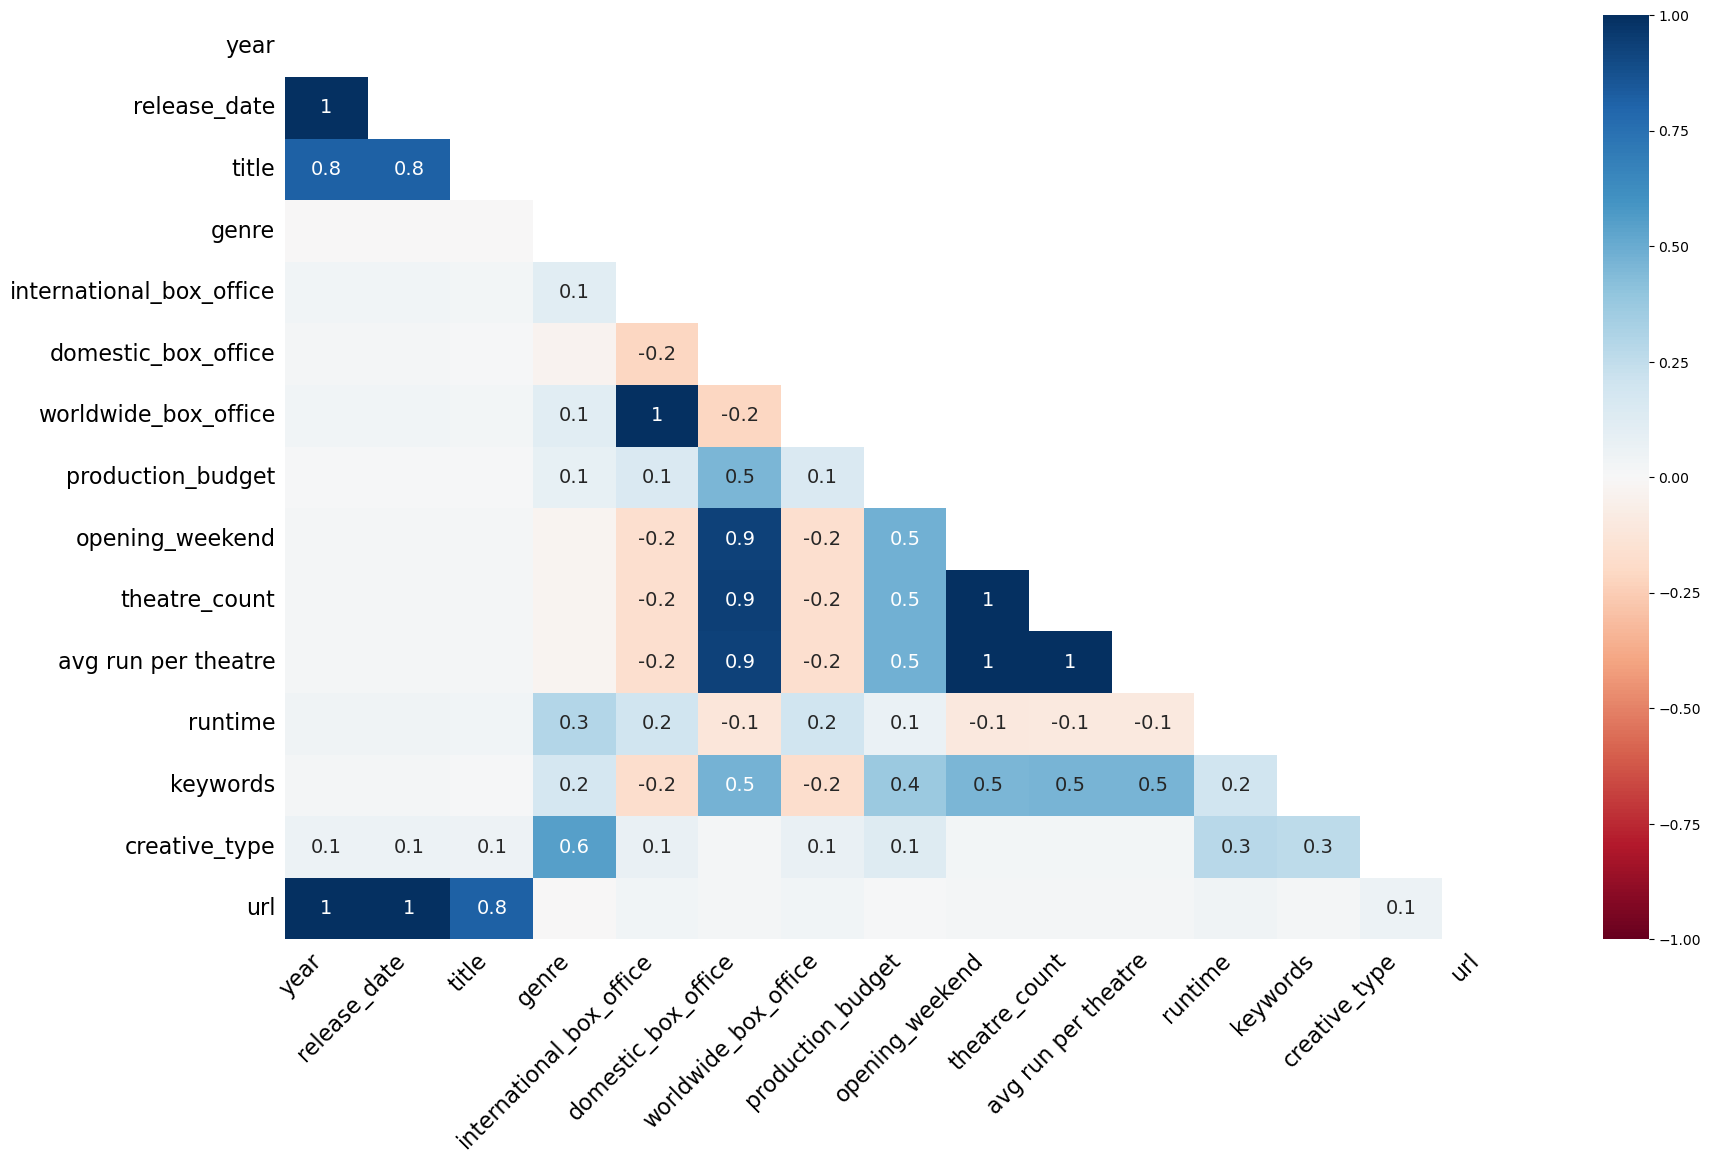

In [18]:
msno.heatmap(sales)

TypeError: object of type 'type' has no len()

In [23]:
# There is something going on with the world_wide box office

sales['worldwide_box_office'].astype('int', errors='raise')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<AxesSubplot:ylabel='Frequency'>

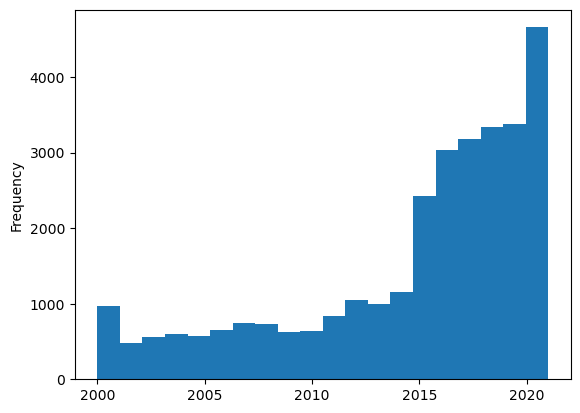

In [37]:
sales['year'].plot(kind='hist', bins=20)

In [12]:
sales['release_date'].min()

NameError: name 'sales' is not defined

## Expert reviews dataset

In [67]:
expert_reviews = pd.read_excel('data/ExpertReviewsClean43LIWC.xlsx',
                            #    dtype={''},
                            usecols=['url', 'idvscore', 'reviewer', 'posemo', 'negemo'])
expert_reviews.head()

,url,idvscore,reviewer,posemo,negemo
0,https://www.metacritic.com/movie/bronson,100.0,"""Andrew O'Hehir""",0.00,0.00
1,https://www.metacritic.com/movie/bronson,90.0,'A.O. Scott',6.67,0.00
2,https://www.metacritic.com/movie/bronson,90.0,None,0.00,2.50
3,https://www.metacritic.com/movie/bronson,83.0,'Noel Murray',5.13,5.13
4,https://www.metacritic.com/movie/bronson,80.0,'Joshua Rothkopf',0.00,0.00


In [78]:
expert_reviews[~expert_reviews['reviewer'].isnull()]['reviewer'].apply(len).max()

26

In [40]:
expert_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 98 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           1000 non-null   object 
 1   idvscore      1000 non-null   int64  
 2   reviewer      1000 non-null   object 
 3   dateP         1000 non-null   object 
 4   Rev           1000 non-null   object 
 5   WC            1000 non-null   int64  
 6   Analytic      1000 non-null   float64
 7   Clout         1000 non-null   float64
 8   Authentic     1000 non-null   float64
 9   Tone          1000 non-null   float64
 10  WPS           1000 non-null   float64
 11  Sixltr        1000 non-null   float64
 12  Dic           1000 non-null   float64
 13  function      1000 non-null   float64
 14  pronoun       1000 non-null   float64
 15  ppron         1000 non-null   float64
 16  i             1000 non-null   float64
 17  we            1000 non-null   float64
 18  you           1000 non-null  